In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft
from numpy.fft import fft, ifft

def circ_cov_sample(c):
    
    N=len(c)
    d=np.fft.ifft(c)*N

    xi=np.random.normal(0,1,2*N).reshape((N,2))@np.array([1,1j])

    Z=np.fft.fft((d**0.5)*xi)/np.sqrt(N)
    X=Z.real
    Y=Z.imag
    
    return X, Y, d, xi

def circ_embed(c):
    
    N = len(c)
    c_new = np.zeros(2*(N-1))
    c_new[0:N] = c
    
    for i in range(N-2):
        c_new[N+i]=c[N-1-i]
        
    return c_new

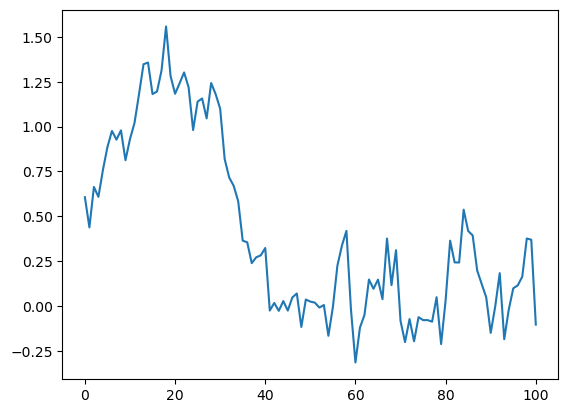

In [2]:
# Plotting the sample paths

T=1
l=1
dt=0.01
n=int(T/dt)

c = np.zeros(n+1)

for i in range(n+1):
    c[i] = np.exp(-i*dt/l)

c_new = circ_embed(c)

X,Y,d,xi = circ_cov_sample(c_new)

sample1 = X[0:(n+1)]
sample2 = Y[0:(n+1)]

plt.plot(sample1)

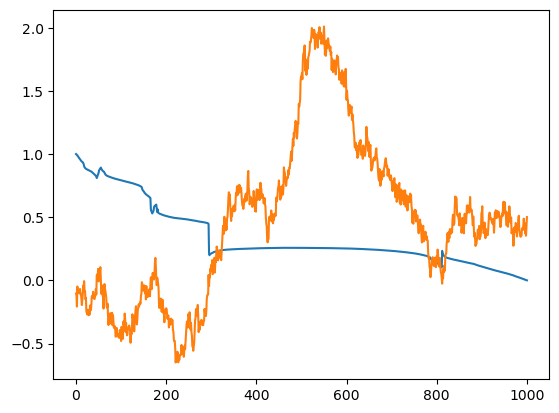

In [3]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000

D1 = np.diag(np.ones(N-1),1)+np.diag(-np.ones(N),0)
D2 = np.diag(np.ones(N),0)+np.diag(-np.ones(N-1),-1)

T=1
l=1
n=N
dt=T/n

c = np.zeros(n+1)

for i in range(n+1):
    c[i] = np.exp(-i*dt/l)


c_new = circ_embed(c)



X,Y,d,xi = circ_cov_sample(c_new)

K = X[0:(n+1)]



D = np.zeros((n-1,n-1))

for i in range(n-1):
    D[i,i] = -0.5*(K[i]+2*K[i+1]+K[i+2])

for i in range(n-2):
    D[i,i+1] = 0.5*(K[i+1]+K[i+2])
    D[i+1,i] = 0.5*(K[i+1]+K[i+2])

p = np.ones(n-1)*dt**2
p[0] = (dt**2+0.5*(K[0]+K[1]))



x = np.linalg.solve(-D,p)

y=np.zeros(n+1)

y[0]=1
y[1:n]=x

plt.plot(y)

plt.plot(K)